<a href="https://colab.research.google.com/github/saitejagoud96/Machine-learning/blob/master/cats_vs_Dogs%20using%20neural%20networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

In [0]:
import zipfile
import os

In [0]:
path='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(path,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir='/tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [0]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))

1000
1000
500
500


Clearly we can see the data is limited to 2000 training and 1000 validation examples. 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Building a model from scratch.

In [0]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [0]:
train_datagen=ImageDataGenerator(rescale=1.0/255,horizontal_flip=True,width_shift_range=0.1,
                                 rotation_range=20,height_shift_range=0.1,
                                 shear_range=0.2,zoom_range=0.2,fill_mode='nearest')
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),
                                                  class_mode='binary',batch_size=20)
validation_datagen=ImageDataGenerator(rescale=1.0/255)
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(150,150),
                                                            class_mode='binary',batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history=model.fit(train_generator,steps_per_epoch=100,epochs=20,
                            validation_data=validation_generator,
                            validation_steps=50,verbose=1)

Epoch 1/20
100/100 [==============================] - 17s 166ms/step - loss: 0.7286 - accuracy: 0.4975 - val_loss: 0.6871 - val_accuracy: 0.6010
Epoch 2/20
100/100 [==============================] - 16s 164ms/step - loss: 0.7249 - accuracy: 0.5455 - val_loss: 0.6648 - val_accuracy: 0.6190
Epoch 3/20
100/100 [==============================] - 17s 165ms/step - loss: 0.6688 - accuracy: 0.5995 - val_loss: 0.6510 - val_accuracy: 0.5840
Epoch 4/20
100/100 [==============================] - 16s 165ms/step - loss: 0.6778 - accuracy: 0.6165 - val_loss: 0.6060 - val_accuracy: 0.6750
Epoch 5/20
100/100 [==============================] - 16s 165ms/step - loss: 0.6435 - accuracy: 0.6465 - val_loss: 0.5898 - val_accuracy: 0.6560
Epoch 6/20
100/100 [==============================] - 16s 164ms/step - loss: 0.6391 - accuracy: 0.6565 - val_loss: 0.5898 - val_accuracy: 0.6960
Epoch 7/20
100/100 [==============================] - 16s 164ms/step - loss: 0.6100 - accuracy: 0.6555 - val_loss: 1.4712 - val_ac

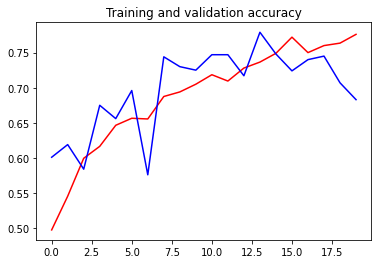

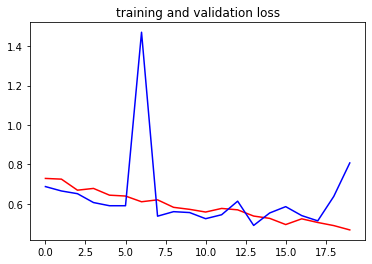

In [0]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs,acc,'r',label='Training')
plt.plot(epochs,val_acc,'b',label='validation')
plt.title("Training and validation accuracy")
plt.figure()

plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("training and validation loss")
#plt.figure()
plt.show()


We can see the validation accuracy is close to 75% and training accuracy is close to 80% so we can conlcude that the model is not over fitting the data.

Now building the model using trasnfer learning and fine tuning. Here we are using vgg16 model for transfer learning. VGG16 consists of several layers and for our prupose we are using half of the layers because the dataset is very small and it may lead to overfitting.

In [0]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalMaxPooling2D
pretrained_model=VGG16(include_top=False,weights='imagenet',input_shape=(220,220,3))
for layer in pretrained_model.layers[:15]:
  layer.traianable=False
for layer in pretrained_model.layers[15:]:
  layer.trainable=True
last_layer=pretrained_model.get_layer('block2_pool')
last_output=last_layer.output
x=GlobalMaxPooling2D()(last_output)
x=Dense(512,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(1,activation='sigmoid')(x)
model_1=Model(pretrained_model.input,x)
model_1.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 220, 220, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 220, 220, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 220, 220, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 110, 110, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 110, 110, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 110, 110, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 55, 55, 128)       0   

In [0]:
history_1=model_1.fit(train_generator,steps_per_epoch=100,epochs=15,
                            validation_data=validation_generator,
                      validation_steps=50,verbose=1)

Epoch 1/15
100/100 [==============================] - 18s 183ms/step - loss: 1.5718 - accuracy: 0.5145 - val_loss: 0.6857 - val_accuracy: 0.5130
Epoch 2/15
100/100 [==============================] - 18s 181ms/step - loss: 0.6852 - accuracy: 0.5530 - val_loss: 0.6675 - val_accuracy: 0.5770
Epoch 3/15
100/100 [==============================] - 18s 181ms/step - loss: 0.6843 - accuracy: 0.5365 - val_loss: 0.6709 - val_accuracy: 0.5620
Epoch 4/15
100/100 [==============================] - 18s 182ms/step - loss: 0.6712 - accuracy: 0.5710 - val_loss: 0.6669 - val_accuracy: 0.5750
Epoch 5/15
100/100 [==============================] - 18s 181ms/step - loss: 0.6560 - accuracy: 0.6145 - val_loss: 0.6540 - val_accuracy: 0.6000
Epoch 6/15
100/100 [==============================] - 18s 180ms/step - loss: 0.6686 - accuracy: 0.6135 - val_loss: 0.6341 - val_accuracy: 0.6400
Epoch 7/15
100/100 [==============================] - 18s 181ms/step - loss: 0.6427 - accuracy: 0.6410 - val_loss: 0.6244 - val_ac

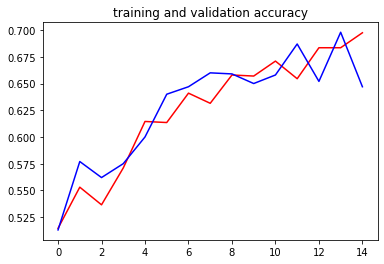

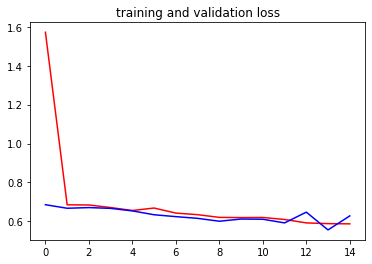

<Figure size 432x288 with 0 Axes>

In [0]:
acc_1=history_1.history['accuracy']
val_acc_1=history_1.history['val_accuracy']
loss_1=history_1.history['loss']
val_loss_1=history_1.history['val_loss']
epochs_1=range(len(acc_1))
plt.plot(epochs_1,acc_1,'r')
plt.plot(epochs_1,val_acc_1,'b')
plt.title("training and validation accuracy")
plt.figure()
plt.plot(epochs_1,loss_1,'r')
plt.plot(epochs_1,val_loss_1,'b')
plt.title("training and validation loss")
plt.figure()
plt.show()

Here we tried to implement fine tuning with VGG16 though we can see the accuracy is not upto the mark of the neural network from initial model. SO we can conclude that the model depth never gives the desired accuracy untill we have huge training set. Here we applied dropout and image augmentation since the accuracy is only 75% for the initial model and 70 from the transfer learning model we can increase the model accuracy further by loading more data into the training and then predicting the results.

In [0]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
uploaded=files.upload()
for file in uploaded:
  path='/content/'+file
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)
  if classes[0]>0:
    print(file+"is a dog")
  else:
    print(file+"is a cat")


Saving cats-photo-320014.jpeg to cats-photo-320014 (7).jpeg
Saving cats-photo-1741205.jpeg to cats-photo-1741205 (7).jpeg
Saving dogs-photo-257540.jpeg to dogs-photo-257540 (7).jpeg
Saving dogs-photo-434090.jpeg to dogs-photo-434090 (7).jpeg
cats-photo-320014.jpegis a dog
cats-photo-1741205.jpegis a dog
dogs-photo-257540.jpegis a dog
dogs-photo-434090.jpegis a dog


Here the model predicts everything as dog. The major drawback is the training data since our training is limited to 2000 images our model fails to capture the pattern like cats and dogs with different colours and whether they turned around and some dogs are similar to cats to differentiate them our model needs to see the patterns which can be obtained by using more data for training the model.